In [1]:
from keras import layers, models
from sklearn import preprocessing

from keras.models import Model
from keras.utils import np_utils 
import tensorflow.keras as tk
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Using TensorFlow backend.
c:\Users\lunaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\lunaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\lunaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\lunaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc=0)

In [3]:
(X_train, y_train), (X_test, y_test) = tk.datasets.boston_housing.load_data()
scaler = preprocessing.MinMaxScaler() 

# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min 
# 위와 같은 식을 통해 연속형 변수를 0~1로 변환



57344/57026 [==============================] - 0s 0us/step


In [4]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [5]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
X_train[0]

array([0.01378163, 0.        , 0.28152493, 0.        , 0.31481481,
       0.49980635, 0.91452111, 0.29719123, 0.13043478, 0.22753346,
       0.89361702, 1.        , 0.46881898])

In [7]:
Nin = 13
Nh = 5
Nout = 1

x = layers.Input(shape=(Nin,), name='input_x')
hidden = layers.Dense(Nh,activation='relu')(x)
output = layers.Dense(Nout)(hidden)

model = Model(inputs=x, outputs=output)

model.compile(loss='mse', optimizer='sgd')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_x (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 70        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


In [8]:

history = model.fit(X_train, y_train, epochs=300, batch_size=100, validation_split=0.2, verbose=2)

performace_test = model.evaluate(X_test, y_test, batch_size=100)
print('\nTest Loss -> {:.2f}'.format(performace_test))



Instructions for updating:
Use tf.cast instead.
Train on 323 samples, validate on 81 samples
Epoch 1/300
 - 0s - loss: 562.4421 - val_loss: 528.2964
Epoch 2/300
 - 0s - loss: 352.0743 - val_loss: 119.0624
Epoch 3/300
 - 0s - loss: 115.7065 - val_loss: 100.3349
Epoch 4/300
 - 0s - loss: 80.1197 - val_loss: 75.9387
Epoch 5/300
 - 0s - loss: 65.8550 - val_loss: 109.7837
Epoch 6/300
 - 0s - loss: 62.1185 - val_loss: 61.8643
Epoch 7/300
 - 0s - loss: 49.9151 - val_loss: 57.4886
Epoch 8/300
 - 0s - loss: 46.5787 - val_loss: 49.4439
Epoch 9/300
 - 0s - loss: 47.8503 - val_loss: 95.2650
Epoch 10/300
 - 0s - loss: 48.0018 - val_loss: 44.7178
Epoch 11/300
 - 0s - loss: 51.5317 - val_loss: 43.9653
Epoch 12/300
 - 0s - loss: 40.4862 - val_loss: 42.7198
Epoch 13/300
 - 0s - loss: 37.1856 - val_loss: 43.9126
Epoch 14/300
 - 0s - loss: 43.1767 - val_loss: 43.4631
Epoch 15/300
 - 0s - loss: 48.6177 - val_loss: 36.0165
Epoch 16/300
 - 0s - loss: 44.2389 - val_loss: 36.3721
Epoch 17/300
 - 0s - loss: 39

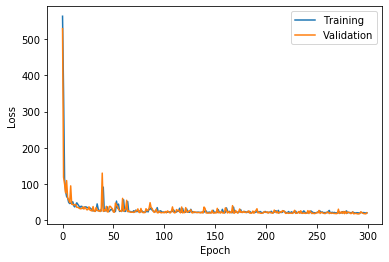

In [9]:
plot_loss(history)
plt.show()

In [10]:
predicted_y = model.predict(X_test)

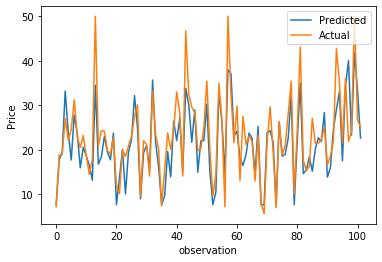

In [11]:
plt.plot(predicted_y)
plt.plot(y_test)
plt.ylabel('Price')
plt.xlabel('observation')
plt.legend(['Predicted', 'Actual'], loc=0)

In [12]:
r2_score(predicted_y, y_test)

0.5934720331276648

In [13]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [14]:
from sklearn import model_selection, metrics
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import os

from keras import backend as K
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

https://www.cs.toronto.edu/~kriz/cifar.html



In [15]:
(X, y), (x_test, y_test_o) = tk.datasets.cifar10.load_data()
nb_classes=10
in_shape = X.shape[1:]

170500096/170498071 [==============================] - 25s 0us/step


In [16]:
X.shape

(50000, 32, 32, 3)

In [17]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.2, random_state=True)

In [18]:
X_train # y= ax1 + bx2 + cx3

array([[[[ 18,  18,  17],
         [ 22,  23,  19],
         [ 37,  38,  33],
         ...,
         [193, 215, 228],
         [189, 210, 223],
         [191, 213, 226]],

        [[ 23,  25,  21],
         [ 26,  27,  21],
         [ 32,  31,  23],
         ...,
         [120, 144, 128],
         [106, 130, 114],
         [122, 146, 130]],

        [[ 24,  30,  22],
         [ 23,  23,  15],
         [ 42,  38,  29],
         ...,
         [ 85, 106,  65],
         [ 85, 106,  65],
         [ 86, 107,  66]],

        ...,

        [[179, 149, 119],
         [176, 145, 116],
         [179, 149, 119],
         ...,
         [172, 150, 121],
         [186, 161, 130],
         [192, 164, 131]],

        [[178, 150, 120],
         [172, 145, 115],
         [176, 149, 119],
         ...,
         [197, 168, 134],
         [194, 164, 131],
         [192, 163, 128]],

        [[174, 147, 116],
         [174, 147, 116],
         [177, 150, 119],
         ...,
         [195, 163, 133],
        

In [19]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

In [20]:
scaler = MinMaxScaler()
n = X_train.shape[0]
X_train = scaler.fit_transform(X_train.reshape(n, -1)).reshape(X_train.shape)

n = X_val.shape[0]
X_val = scaler.transform(X_val.reshape(n, -1)).reshape(X_val.shape)


n = x_test.shape[0]
x_test = scaler.transform(x_test.reshape(n, -1)).reshape(x_test.shape)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

X_train shape: (40000, 32, 32, 3)
40000 train samples
10000 test samples


In [21]:
y_train = np_utils.to_categorical(y_train, nb_classes)
y_val = np_utils.to_categorical(y_val, nb_classes)
y_test = np_utils.to_categorical(y_test_o, nb_classes)

In [22]:
y_val[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [23]:
x = Input(in_shape)
h = Conv2D(32, kernel_size=(3, 3), activation='relu',
                   input_shape=in_shape)(x)
h = Conv2D(64, kernel_size=(3, 3), activation='relu')(h)
h = MaxPooling2D(pool_size=(2, 2))(h)
h = Dropout(0.25)(h)
z_cl = Flatten()(h)


h = Dense(128, activation='relu')(z_cl)
z_fl = Dropout(0.5)(h)
y = Dense(nb_classes, activation='softmax', name='preds')(z_fl)

cl_part = Model(x, z_cl)
fl_part = Model(x, z_fl)

model=Model(inputs=x, outputs=y)
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1605

In [24]:
history = model.fit(x=X_train, y=y_train, epochs=100, batch_size=128, verbose=1, validation_data=[X_val, y_val])

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 194s 5ms/step - loss: 1.7047 - accuracy: 0.3765 - val_loss: 1.2985 - val_accuracy: 0.5400
Epoch 2/100
 1664/40000 [>.............................] - ETA: 3:10 - loss: 1.4443 - accuracy: 0.4802

KeyboardInterrupt: 

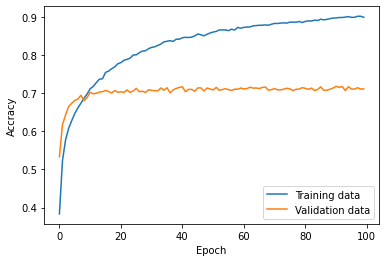

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc=0)

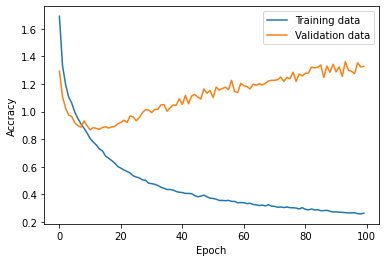

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Accracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc=0)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)

print('Confusion matrix')
y_pred = model.predict(x_test, verbose=0)
y_pred_1 = np.argmax(y_pred, axis=1)
print(metrics.confusion_matrix(y_test_o, y_pred_1))

print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 1.3564 - accuracy: 0.7013
Confusion matrix
[[742  29  49  20  17   4   9  11  81  38]
 [ 26 837   8   5   2   4   7   2  16  93]
 [ 71   8 519  82 102  79  67  38  18  16]
 [ 19  16  72 538  46 161  60  44  23  21]
 [ 29   4  61  69 664  32  46  70  16   9]
 [ 15   8  42 191  47 602  24  52   9  10]
 [  4  15  53  78  58  19 749   9   6   9]
 [ 18   3  42  41  58  61   8 742   3  24]
 [ 65  56   9  12   0   5   4   4 807  38]
 [ 29  85   8  11   6   7   5   9  27 813]]
Test score: 1.3564255237579346
Test accuracy: 0.7013000249862671


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve

In [ ]:
y_pred_1

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [ ]:
recall_score(y_test_o, y_pred_1, average='macro')

0.7013

In [ ]:
precision_score(y_test_o, y_pred_1, average='macro')

0.6997795944274777

In [ ]:
f1_score(y_test_o, y_pred_1, average='macro')

0.7000129628456058